In [1]:
# Creates a graph.
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
c = []
config = tf.ConfigProto(log_device_placement=True)
sess = tf.Session(config=config)

Instructions for updating:
non-resource variables are not supported in the long term
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro GV100, pci bus id: 0000:b3:00.0, compute capability: 7.0



In [2]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)
tf.compat.v1.test.is_gpu_available()

True

In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
d = '/device:XLA_GPU:0'
with tf.device(d):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
    c.append(tf.matmul(a, b))

with tf.device(d):
    sum1 = tf.add_n(c)
    print(sum1)


Tensor("MatMul:0", shape=(2, 2), dtype=float32, device=/device:XLA_GPU:0)


In [5]:
%%timeit -n 1000
sess.run(sum1)

427 µs ± 141 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%%timeit -n 100
for d in ['/device:CPU:0']:
    with tf.device(d):
        a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
        b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
        c.append(tf.matmul(a, b))

1.36 ms ± 65.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
from __future__ import print_function
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib
import matplotlib.pyplot as plt
import time

def get_times():

    device_times = {
        "/device:XLA_GPU:0":[],
        "/device:CPU:0":[]
    }
    
    matrix_sizes = range(1000,5000,1000)

    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random.uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random.uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

        
    return device_times, matrix_sizes


device_times, matrix_sizes =get_times()   
gpu_times = device_times["/device:XLA_GPU:0"]
cpu_times = device_times["/device:CPU:0"]


####### Calculating on the /device:XLA_GPU:0 #######
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro GV100, pci bus id: 0000:b3:00.0, compute capability: 7.0

[[267.8 260.  249.9 ... 255.8 250.5 257.2]
 [257.8 261.  250.1 ... 251.1 251.1 254.8]
 [251.  254.2 248.  ... 247.2 244.2 253.4]
 ...
 [248.4 248.4 239.2 ... 245.6 241.8 246.8]
 [261.2 260.5 258.8 ... 253.1 254.6 260.2]
 [262.8 255.8 252.6 ... 259.8 257.8 259.5]]
####### Calculating on the /device:CPU:0 #######
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro GV100, pci bus id: 0000:b3:00.0, compute capability: 7.0

[[244.5 244.1 239.  ... 238.4 237.8 243. ]

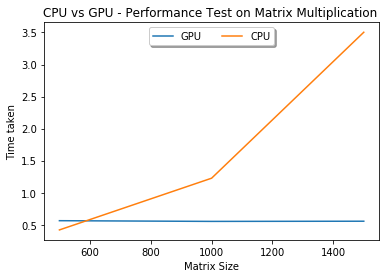

In [30]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(matrix_sizes[:len(gpu_times)], gpu_times, label='GPU')
ax.plot(matrix_sizes[:len(cpu_times)], cpu_times, label='CPU')
plt.title('CPU vs GPU - Performance Test on Matrix Multiplication ')
plt.xlabel(xlabel="Matrix Size")
plt.ylabel(ylabel="Time taken")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

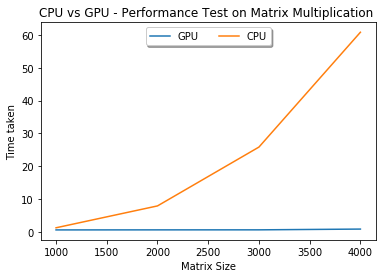

In [32]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(matrix_sizes[:len(gpu_times)], gpu_times, label='GPU')
ax.plot(matrix_sizes[:len(cpu_times)], cpu_times, label='CPU')
plt.title('CPU vs GPU - Performance Test on Matrix Multiplication ')
plt.xlabel(xlabel="Matrix Size")
plt.ylabel(ylabel="Time taken")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()